<a href="https://colab.research.google.com/github/yellow-seed/aiit-machine-learning/blob/main/report2_coarse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import datasets
from tensorflow.keras import utils

課題2 fileラベル
授業の例を基本形としてパラメータを一つずつ変更してみて変化について評価する

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar100.load_data(label_mode='coarse')
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

169001437/169001437 [==============================] - 13s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)
x_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000, 1)


In [ ]:
x_train=x_train/255 # 255で割るのはrgbの正規化
x_test=x_test/255
y_train=utils.to_categorical(y_train,20)
y_test=utils.to_categorical(y_test,20)

####################### ここまで共通 ###################################

####################### 比較の基準となるモデル###################################

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1250/1250 [==============================] - 15s 5ms/step - loss: 2.5030 - acc: 0.2225 - val_loss: 2.2477 - val_acc: 0.3178
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1321 - acc: 0.3418 - val_loss: 1.9251 - val_acc: 0.4066
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9477 - acc: 0.3957 - val_loss: 1.8018 - val_acc: 0.4360
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8166 - acc: 0.4339 - val_loss: 1.7098 - val_acc: 0.4650
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7233 - acc: 0.4598 - val_loss: 1.6606 - val_acc: 0.4837
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6355 - acc: 0.4879 - val_loss: 1.5955 - val_acc: 0.5003
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5586 - acc: 0.5056 - val_loss: 1.6026 - val_acc: 0.4953
Epoch 8/20
1250/1250 [==============================] - 5s 4m

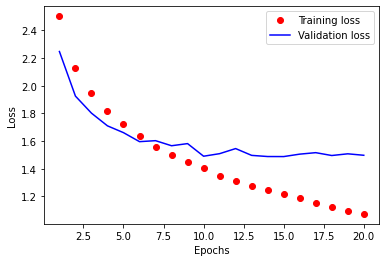

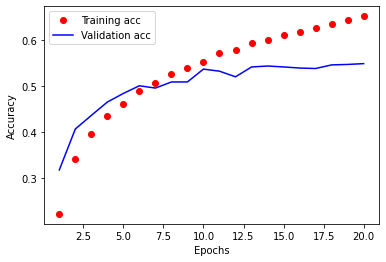

313/313 [==============================] - 1s 3ms/step - loss: 1.5089 - acc: 0.5460
[1.5088742971420288, 0.5460000038146973]
CPU times: user 2min 26s, sys: 20.9 s, total: 2min 47s
Wall time: 1min 56s


In [ ]:
%%time
model = models.Sequential()
model.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.25))

model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=20, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model.summary()

history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model.evaluate(x_test, y_test))

色々と設定条件を変えてみる

方針として



1.   Conv2Dのパラメータ変更(filters, kernel_size, strides, padding)
* filters=48, filters=64
* kernel_size=(6,6), kernel_size=(9,9)
* strides=(3,3), strides=(5,5)

1.   学習パラメータ変更(epoch数, batch_size, validation_splitの変更)
* epoch=100, 1000, 10000
* batch_size=48, 64
* validation_split=0.4, 0.6

1.   層の数をより増やす(+1, +2, +3)

1. optimizerの変更(lrについては同じ値とする)
*   SGD
*   Adagrad
*.  RMSprop






Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 48)        1344      
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 48)        20784     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 48)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 48)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 48)        20784     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 48)        20784     
                                                      

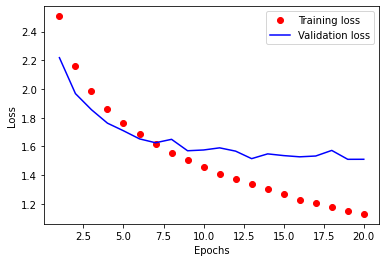

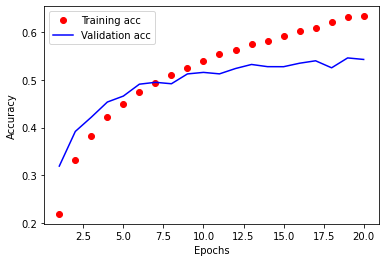

313/313 [==============================] - 1s 2ms/step - loss: 1.5204 - acc: 0.5383
[1.5204195976257324, 0.5382999777793884]
CPU times: user 2min 24s, sys: 19.7 s, total: 2min 43s
Wall time: 1min 46s


In [ ]:
%%time
conv2D_filter_48_model = models.Sequential()
conv2D_filter_48_model.add(
    layers.Conv2D(
        filters=48,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_48_model.add(
    layers.Conv2D(
        filters=48,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_48_model.add(layers.MaxPooling2D(pool_size=(2,2)))

conv2D_filter_48_model.add(layers.Dropout(0.25))

conv2D_filter_48_model.add(
    layers.Conv2D(
        filters=48,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_48_model.add(
    layers.Conv2D(
        filters=48,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_48_model.add(layers.MaxPooling2D(pool_size=(2,2)))
conv2D_filter_48_model.add(layers.Dropout(0.25))

conv2D_filter_48_model.add(layers.Flatten())
conv2D_filter_48_model.add(layers.Dense(units=512, activation='relu'))
conv2D_filter_48_model.add(layers.Dropout(0.5))
conv2D_filter_48_model.add(layers.Dense(units=20, activation='softmax'))

conv2D_filter_48_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

conv2D_filter_48_model.summary()

history=conv2D_filter_48_model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(conv2D_filter_48_model.evaluate(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

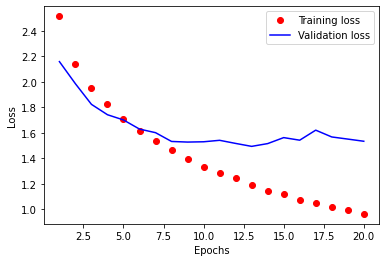

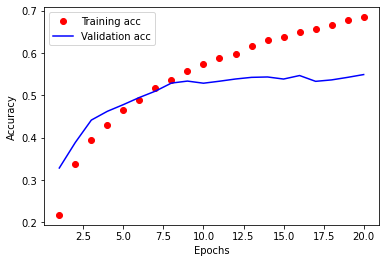

313/313 [==============================] - 1s 3ms/step - loss: 1.5301 - acc: 0.5470
[1.530142068862915, 0.546999990940094]
CPU times: user 2min 25s, sys: 19.4 s, total: 2min 44s
Wall time: 1min 48s


In [ ]:
%%time
conv2D_filter_64_model = models.Sequential()
conv2D_filter_64_model.add(
    layers.Conv2D(
        filters=64,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_64_model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_64_model.add(layers.MaxPooling2D(pool_size=(2,2)))

conv2D_filter_64_model.add(layers.Dropout(0.25))

conv2D_filter_64_model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_64_model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_64_model.add(layers.MaxPooling2D(pool_size=(2,2)))
conv2D_filter_64_model.add(layers.Dropout(0.25))

conv2D_filter_64_model.add(layers.Flatten())
conv2D_filter_64_model.add(layers.Dense(units=512, activation='relu'))
conv2D_filter_64_model.add(layers.Dropout(0.5))
conv2D_filter_64_model.add(layers.Dense(units=20, activation='softmax'))

conv2D_filter_64_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

conv2D_filter_64_model.summary()

history=conv2D_filter_64_model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(conv2D_filter_64_model.evaluate(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        3488      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        36896     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        73792     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        147520    
                                                      

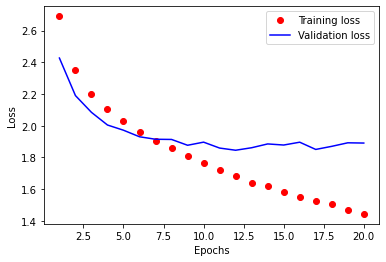

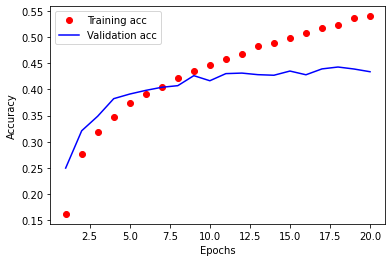

313/313 [==============================] - 1s 3ms/step - loss: 1.8908 - acc: 0.4415
[1.8908113241195679, 0.4415000081062317]
CPU times: user 2min 33s, sys: 19.4 s, total: 2min 52s
Wall time: 1min 55s


In [ ]:
%%time
model_kernel_66 = models.Sequential()
model_kernel_66.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(6,6),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_66.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(6,6),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_66.add(layers.MaxPooling2D(pool_size=(2,2)))

model_kernel_66.add(layers.Dropout(0.25))

model_kernel_66.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(6,6),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_66.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(6,6),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_66.add(layers.MaxPooling2D(pool_size=(2,2)))
model_kernel_66.add(layers.Dropout(0.25))

model_kernel_66.add(layers.Flatten())
model_kernel_66.add(layers.Dense(units=512, activation='relu'))
model_kernel_66.add(layers.Dropout(0.5))
model_kernel_66.add(layers.Dense(units=20, activation='softmax'))

model_kernel_66.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_kernel_66.summary()

history=model_kernel_66.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_kernel_66.evaluate(x_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        7808      
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        82976     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        165952    
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        331840    
                                                      

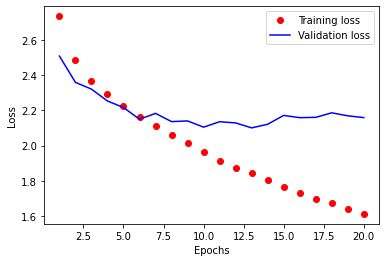

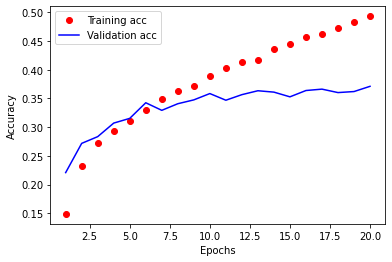

313/313 [==============================] - 1s 3ms/step - loss: 2.1398 - acc: 0.3758
[2.139810085296631, 0.3758000135421753]
CPU times: user 2min 32s, sys: 19.4 s, total: 2min 51s
Wall time: 1min 54s


In [ ]:
%%time
model_kernel_99 = models.Sequential()
model_kernel_99.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(9,9),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_99.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(9,9),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_99.add(layers.MaxPooling2D(pool_size=(2,2)))

model_kernel_99.add(layers.Dropout(0.25))

model_kernel_99.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(9,9),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_99.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(9,9),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_99.add(layers.MaxPooling2D(pool_size=(2,2)))
model_kernel_99.add(layers.Dropout(0.25))

model_kernel_99.add(layers.Flatten())
model_kernel_99.add(layers.Dense(units=512, activation='relu'))
model_kernel_99.add(layers.Dropout(0.5))
model_kernel_99.add(layers.Dense(units=20, activation='softmax'))

model_kernel_99.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_kernel_99.summary()

history=model_kernel_99.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_kernel_99.evaluate(x_test, y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 11, 11, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 2, 2, 32)         0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 2, 2, 32)          0         
                                                                 
 conv2d_22 (Conv2D)          (None, 2, 2, 64)          18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2, 64)          36928     
                                                      

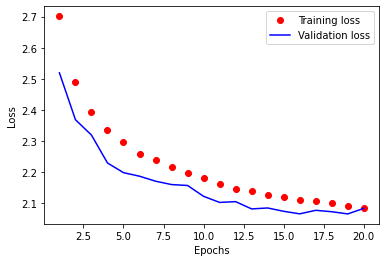

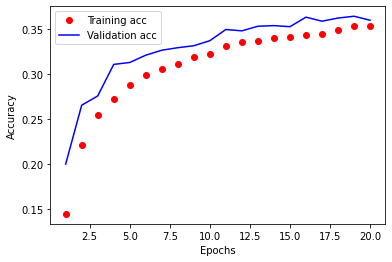

313/313 [==============================] - 1s 2ms/step - loss: 2.0883 - acc: 0.3568
[2.088336706161499, 0.35679998993873596]
CPU times: user 2min 13s, sys: 19.3 s, total: 2min 33s
Wall time: 1min 38s


In [ ]:
%%time
model_strides_33 = models.Sequential()
model_strides_33.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(3,3),
        padding='same',
        activation='relu'
    )
)

model_strides_33.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(3,3),
        padding='same',
        activation='relu'
    )
)

model_strides_33.add(layers.MaxPooling2D(pool_size=(2,2)))

model_strides_33.add(layers.Dropout(0.25))

model_strides_33.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_strides_33.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_strides_33.add(layers.MaxPooling2D(pool_size=(2,2)))
model_strides_33.add(layers.Dropout(0.25))

model_strides_33.add(layers.Flatten())
model_strides_33.add(layers.Dense(units=512, activation='relu'))
model_strides_33.add(layers.Dropout(0.5))
model_strides_33.add(layers.Dense(units=20, activation='softmax'))

model_strides_33.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_strides_33.summary()

history=model_strides_33.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_strides_33.evaluate(x_test, y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

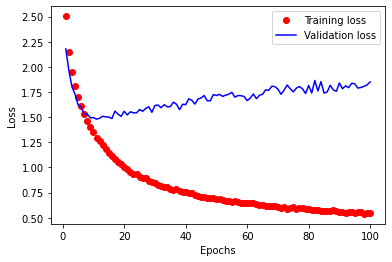

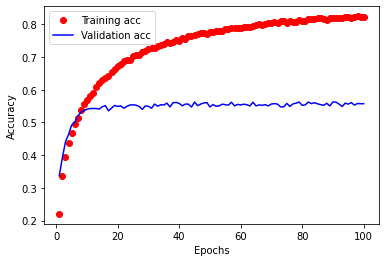

313/313 [==============================] - 1s 3ms/step - loss: 1.8211 - acc: 0.5554
[1.8211370706558228, 0.555400013923645]
CPU times: user 11min 42s, sys: 1min 36s, total: 13min 18s
Wall time: 8min 41s


In [ ]:
%%time
model_epoch_100 = models.Sequential()
model_epoch_100.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_100.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_100.add(layers.MaxPooling2D(pool_size=(2,2)))

model_epoch_100.add(layers.Dropout(0.25))

model_epoch_100.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_100.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_100.add(layers.MaxPooling2D(pool_size=(2,2)))
model_epoch_100.add(layers.Dropout(0.25))

model_epoch_100.add(layers.Flatten())
model_epoch_100.add(layers.Dense(units=512, activation='relu'))
model_epoch_100.add(layers.Dropout(0.5))
model_epoch_100.add(layers.Dense(units=20, activation='softmax'))

model_epoch_100.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_epoch_100.summary()

history=model_epoch_100.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_epoch_100.evaluate(x_test, y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

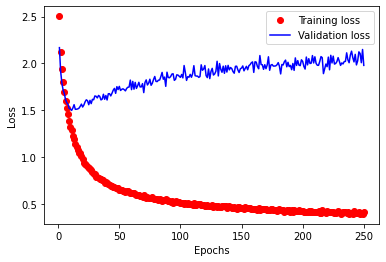

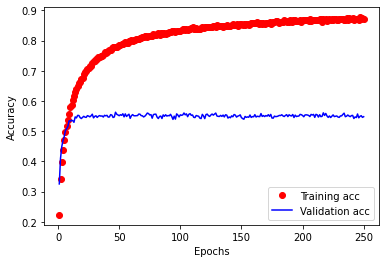

313/313 [==============================] - 1s 3ms/step - loss: 1.9673 - acc: 0.5542
[1.967273235321045, 0.5541999936103821]
CPU times: user 29min 17s, sys: 4min 1s, total: 33min 18s
Wall time: 21min 40s


In [ ]:
%%time
model_epoch_250 = models.Sequential()
model_epoch_250.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_250.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_250.add(layers.MaxPooling2D(pool_size=(2,2)))

model_epoch_250.add(layers.Dropout(0.25))

model_epoch_250.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_250.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_250.add(layers.MaxPooling2D(pool_size=(2,2)))
model_epoch_250.add(layers.Dropout(0.25))

model_epoch_250.add(layers.Flatten())
model_epoch_250.add(layers.Dense(units=512, activation='relu'))
model_epoch_250.add(layers.Dropout(0.5))
model_epoch_250.add(layers.Dense(units=20, activation='softmax'))

model_epoch_250.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_epoch_250.summary()

history=model_epoch_250.fit(x_train,y_train,epochs=250,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_epoch_250.evaluate(x_test, y_test))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

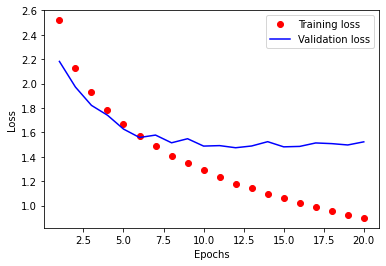

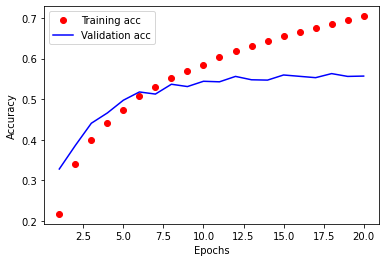

313/313 [==============================] - 1s 3ms/step - loss: 1.5201 - acc: 0.5486
[1.5200632810592651, 0.5486000180244446]
CPU times: user 1min 50s, sys: 14.5 s, total: 2min 4s
Wall time: 1min 19s


In [ ]:
%%time
model_batchsize_48 = models.Sequential()
model_batchsize_48.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_48.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_48.add(layers.MaxPooling2D(pool_size=(2,2)))

model_batchsize_48.add(layers.Dropout(0.25))

model_batchsize_48.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_48.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_48.add(layers.MaxPooling2D(pool_size=(2,2)))
model_batchsize_48.add(layers.Dropout(0.25))

model_batchsize_48.add(layers.Flatten())
model_batchsize_48.add(layers.Dense(units=512, activation='relu'))
model_batchsize_48.add(layers.Dropout(0.5))
model_batchsize_48.add(layers.Dense(units=20, activation='softmax'))

model_batchsize_48.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_batchsize_48.summary()

history=model_batchsize_48.fit(x_train,y_train,epochs=20,batch_size=48,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_batchsize_48.evaluate(x_test, y_test))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

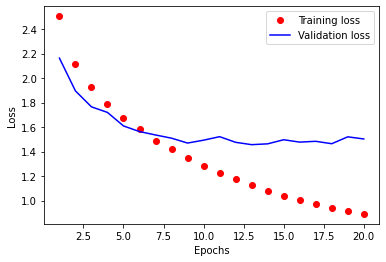

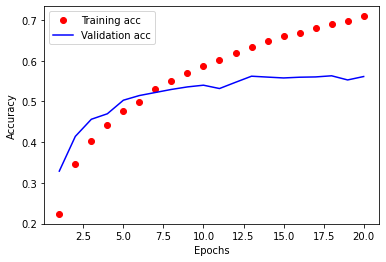

313/313 [==============================] - 1s 2ms/step - loss: 1.4852 - acc: 0.5622
[1.4851880073547363, 0.5622000098228455]
CPU times: user 1min 17s, sys: 9.35 s, total: 1min 27s
Wall time: 57.8 s


In [ ]:
%%time
model_batchsize_64 = models.Sequential()
model_batchsize_64.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_64.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_64.add(layers.MaxPooling2D(pool_size=(2,2)))

model_batchsize_64.add(layers.Dropout(0.25))

model_batchsize_64.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_64.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_64.add(layers.MaxPooling2D(pool_size=(2,2)))
model_batchsize_64.add(layers.Dropout(0.25))

model_batchsize_64.add(layers.Flatten())
model_batchsize_64.add(layers.Dense(units=512, activation='relu'))
model_batchsize_64.add(layers.Dropout(0.5))
model_batchsize_64.add(layers.Dense(units=20, activation='softmax'))

model_batchsize_64.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_batchsize_64.summary()

history=model_batchsize_64.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_batchsize_64.evaluate(x_test, y_test))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

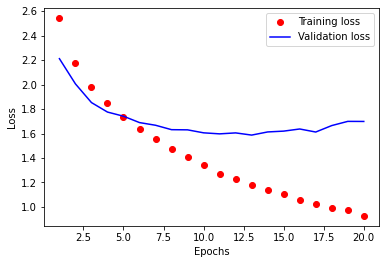

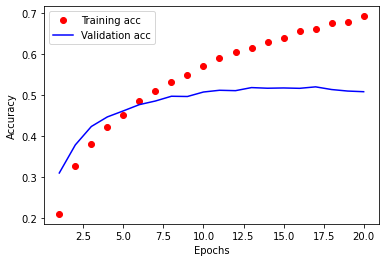

313/313 [==============================] - 1s 2ms/step - loss: 1.6753 - acc: 0.5103
[1.6753132343292236, 0.5102999806404114]
CPU times: user 2min 17s, sys: 18.5 s, total: 2min 36s
Wall time: 1min 40s


In [ ]:
%%time
model_validation_split04 = models.Sequential()
model_validation_split04.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split04.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split04.add(layers.MaxPooling2D(pool_size=(2,2)))

model_validation_split04.add(layers.Dropout(0.25))

model_validation_split04.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split04.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split04.add(layers.MaxPooling2D(pool_size=(2,2)))
model_validation_split04.add(layers.Dropout(0.25))

model_validation_split04.add(layers.Flatten())
model_validation_split04.add(layers.Dense(units=512, activation='relu'))
model_validation_split04.add(layers.Dropout(0.5))
model_validation_split04.add(layers.Dense(units=20, activation='softmax'))

model_validation_split04.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_validation_split04.summary()

history=model_validation_split04.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.4)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_validation_split04.evaluate(x_test, y_test))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_47 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

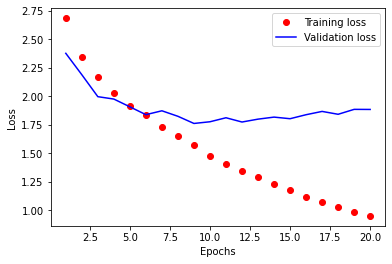

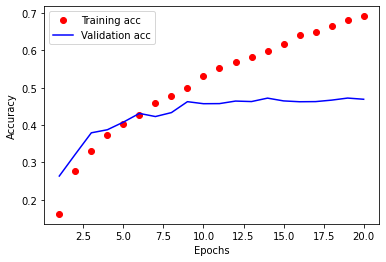

313/313 [==============================] - 1s 2ms/step - loss: 1.8779 - acc: 0.4688
[1.8778547048568726, 0.46880000829696655]
CPU times: user 2min 1s, sys: 19.3 s, total: 2min 20s
Wall time: 1min 27s


In [ ]:
%%time
model_validation_split06 = models.Sequential()
model_validation_split06.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split06.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split06.add(layers.MaxPooling2D(pool_size=(2,2)))

model_validation_split06.add(layers.Dropout(0.25))

model_validation_split06.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split06.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split06.add(layers.MaxPooling2D(pool_size=(2,2)))
model_validation_split06.add(layers.Dropout(0.25))

model_validation_split06.add(layers.Flatten())
model_validation_split06.add(layers.Dense(units=512, activation='relu'))
model_validation_split06.add(layers.Dropout(0.5))
model_validation_split06.add(layers.Dense(units=20, activation='softmax'))

model_validation_split06.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_validation_split06.summary()

history=model_validation_split06.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.6)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_validation_split06.evaluate(x_test, y_test))

# レイヤーの追加

方針


*   Conv2Dを追加した層
*   そこにプーリング層とドロップアウト層を追加



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_50 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 64)        18496     
                                                     

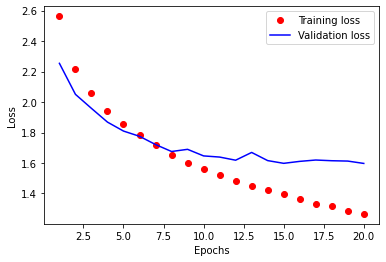

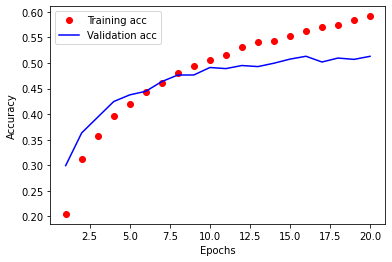

313/313 [==============================] - 1s 3ms/step - loss: 1.5958 - acc: 0.5117
[1.5957627296447754, 0.5116999745368958]
CPU times: user 2min 41s, sys: 19.2 s, total: 3min
Wall time: 2min 2s


In [ ]:
%%time
model_add_Conv2D_layer = models.Sequential()
model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(layers.MaxPooling2D(pool_size=(2,2)))

model_add_Conv2D_layer.add(layers.Dropout(0.25))

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(layers.MaxPooling2D(pool_size=(2,2)))
model_add_Conv2D_layer.add(layers.Dropout(0.25))

model_add_Conv2D_layer.add(layers.Flatten())
model_add_Conv2D_layer.add(layers.Dense(units=512, activation='relu'))
model_add_Conv2D_layer.add(layers.Dropout(0.5))
model_add_Conv2D_layer.add(layers.Dense(units=20, activation='softmax'))

model_add_Conv2D_layer.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_add_Conv2D_layer.summary()

history=model_add_Conv2D_layer.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_add_Conv2D_layer.evaluate(x_test, y_test))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_55 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_56 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_57 (Conv2D)          (None, 16, 16, 64)        18496     
                                                     

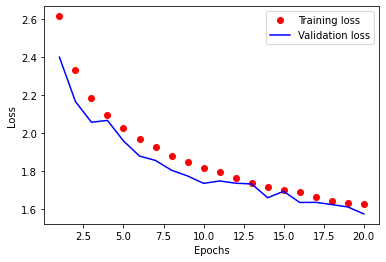

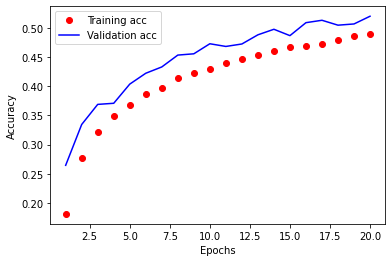

313/313 [==============================] - 1s 3ms/step - loss: 1.5673 - acc: 0.5139
[1.567313313484192, 0.5138999819755554]
CPU times: user 2min 41s, sys: 19.9 s, total: 3min 1s
Wall time: 2min 3s


In [ ]:
%%time
model_add_pooling_layer = models.Sequential()
model_add_pooling_layer.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(layers.MaxPooling2D(pool_size=(2,2)))

model_add_pooling_layer.add(layers.Dropout(0.25))

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(layers.MaxPooling2D(pool_size=(2,2)))
model_add_pooling_layer.add(layers.Dropout(0.25))

model_add_pooling_layer.add(layers.MaxPooling2D(pool_size=(2,2)))
model_add_pooling_layer.add(layers.Dropout(0.25))

model_add_pooling_layer.add(layers.Flatten())
model_add_pooling_layer.add(layers.Dense(units=512, activation='relu'))
model_add_pooling_layer.add(layers.Dropout(0.5))
model_add_pooling_layer.add(layers.Dense(units=20, activation='softmax'))

model_add_pooling_layer.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_add_pooling_layer.summary()

history=model_add_pooling_layer.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_add_pooling_layer.evaluate(x_test, y_test))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_61 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_63 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 2.9999 - acc: 0.0527 - val_loss: 2.9908 - val_acc: 0.0620
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.9912 - acc: 0.0582 - val_loss: 2.9847 - val_acc: 0.0730
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.9812 - acc: 0.0677 - val_loss: 2.9708 - val_acc: 0.0873
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.9645 - acc: 0.0807 - val_loss: 2.9363 - val_acc: 0.1210
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.9132 - acc: 0.1051 - val_loss: 2.8308 - val_acc: 0.1499
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.8129 - acc: 0.1281 - val_loss: 2.7181 - val_acc: 0.1683
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.7487 - acc: 0.1445 - val_loss: 2.6689 - val_acc: 0.1864
Epoch 8/20
1250/1250 [==============================] - 5s 4ms

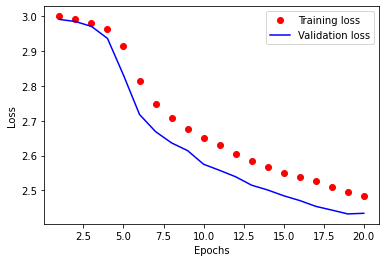

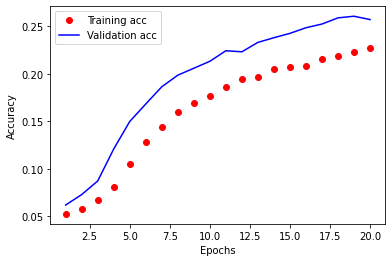

313/313 [==============================] - 1s 2ms/step - loss: 2.4326 - acc: 0.2551
[2.4326491355895996, 0.2551000118255615]
CPU times: user 2min 19s, sys: 19.4 s, total: 2min 38s
Wall time: 1min 43s


In [ ]:
%%time
model_optimizer_sgd = models.Sequential()
model_optimizer_sgd.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_sgd.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_sgd.add(layers.MaxPooling2D(pool_size=(2,2)))

model_optimizer_sgd.add(layers.Dropout(0.25))

model_optimizer_sgd.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_sgd.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_sgd.add(layers.MaxPooling2D(pool_size=(2,2)))
model_optimizer_sgd.add(layers.Dropout(0.25))

model_optimizer_sgd.add(layers.Flatten())
model_optimizer_sgd.add(layers.Dense(units=512, activation='relu'))
model_optimizer_sgd.add(layers.Dropout(0.5))
model_optimizer_sgd.add(layers.Dense(units=20, activation='softmax'))

model_optimizer_sgd.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.SGD(lr=0.001),
    metrics=['acc']
)

model_optimizer_sgd.summary()

history=model_optimizer_sgd.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_optimizer_sgd.evaluate(x_test, y_test))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_46 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_67 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adagrad.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 2.9845 - acc: 0.0671 - val_loss: 2.9512 - val_acc: 0.1098
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.8684 - acc: 0.1086 - val_loss: 2.7506 - val_acc: 0.1474
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.7399 - acc: 0.1419 - val_loss: 2.6607 - val_acc: 0.1879
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.6853 - acc: 0.1627 - val_loss: 2.6119 - val_acc: 0.2084
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.6445 - acc: 0.1787 - val_loss: 2.5765 - val_acc: 0.2182
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.6184 - acc: 0.1867 - val_loss: 2.5497 - val_acc: 0.2259
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.5938 - acc: 0.1942 - val_loss: 2.5232 - val_acc: 0.2357
Epoch 8/20
1250/1250 [==============================] - 5s 4ms

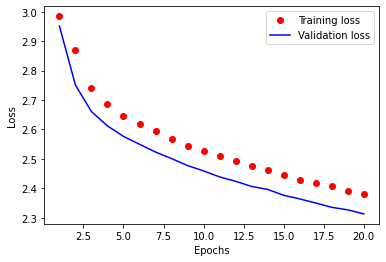

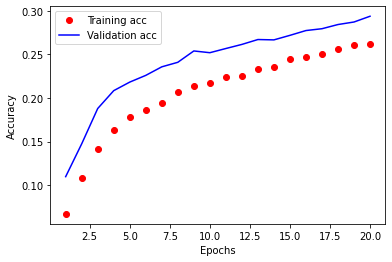

313/313 [==============================] - 1s 2ms/step - loss: 2.3159 - acc: 0.2890
[2.315856695175171, 0.289000004529953]
CPU times: user 2min 22s, sys: 19.2 s, total: 2min 42s
Wall time: 1min 46s


In [ ]:
%%time
model_optimizer_adagrad = models.Sequential()
model_optimizer_adagrad.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_adagrad.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_adagrad.add(layers.MaxPooling2D(pool_size=(2,2)))

model_optimizer_adagrad.add(layers.Dropout(0.25))

model_optimizer_adagrad.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_adagrad.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_adagrad.add(layers.MaxPooling2D(pool_size=(2,2)))
model_optimizer_adagrad.add(layers.Dropout(0.25))

model_optimizer_adagrad.add(layers.Flatten())
model_optimizer_adagrad.add(layers.Dense(units=512, activation='relu'))
model_optimizer_adagrad.add(layers.Dropout(0.5))
model_optimizer_adagrad.add(layers.Dense(units=20, activation='softmax'))

model_optimizer_adagrad.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adagrad(lr=0.001),
    metrics=['acc']
)

model_optimizer_adagrad.summary()

history=model_optimizer_adagrad.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_optimizer_adagrad.evaluate(x_test, y_test))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_69 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_49 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_70 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_71 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1250/1250 [==============================] - 7s 5ms/step - loss: 2.4631 - acc: 0.2388 - val_loss: 2.1492 - val_acc: 0.3406
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.0935 - acc: 0.3575 - val_loss: 2.0396 - val_acc: 0.3645
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9437 - acc: 0.4011 - val_loss: 1.8477 - val_acc: 0.4253
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8590 - acc: 0.4298 - val_loss: 1.7682 - val_acc: 0.4491
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8118 - acc: 0.4475 - val_loss: 1.7608 - val_acc: 0.4666
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8004 - acc: 0.4522 - val_loss: 2.0653 - val_acc: 0.3950
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7990 - acc: 0.4580 - val_loss: 1.8263 - val_acc: 0.4560
Epoch 8/20
1250/1250 [==============================] - 6s 5ms

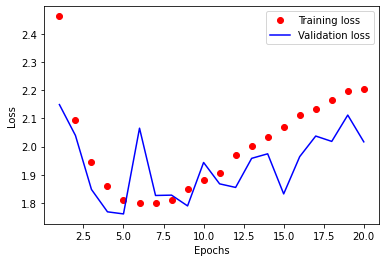

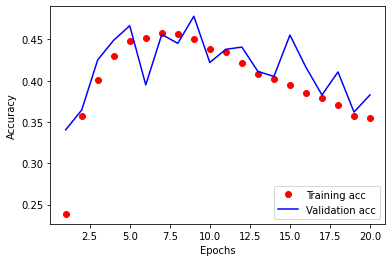

313/313 [==============================] - 1s 2ms/step - loss: 2.0179 - acc: 0.3784
[2.0179271697998047, 0.3783999979496002]
CPU times: user 2min 40s, sys: 19.5 s, total: 2min 59s
Wall time: 2min


In [ ]:
%%time
model_optimizer_RMSprop = models.Sequential()
model_optimizer_RMSprop.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_RMSprop.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_RMSprop.add(layers.MaxPooling2D(pool_size=(2,2)))

model_optimizer_RMSprop.add(layers.Dropout(0.25))

model_optimizer_RMSprop.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_RMSprop.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_RMSprop.add(layers.MaxPooling2D(pool_size=(2,2)))
model_optimizer_RMSprop.add(layers.Dropout(0.25))

model_optimizer_RMSprop.add(layers.Flatten())
model_optimizer_RMSprop.add(layers.Dense(units=512, activation='relu'))
model_optimizer_RMSprop.add(layers.Dropout(0.5))
model_optimizer_RMSprop.add(layers.Dense(units=20, activation='softmax'))

model_optimizer_RMSprop.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=0.001),
    metrics=['acc']
)

model_optimizer_RMSprop.summary()

history=model_optimizer_RMSprop.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_optimizer_RMSprop.evaluate(x_test, y_test))